In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [146]:
df=pd.read_csv("bank-full.csv", delimiter=";")

In [147]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [148]:
for col in df.columns:
    print(col, df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [149]:
df["job"].replace({"admin.": "admin"}, inplace=True)


C:\Users\binar\AppData\Local\Temp\ipykernel_16920\1340768125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace({"admin.": "admin"}, inplace=True)


In [150]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [151]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [152]:
for data in df.duplicated():
  if data==True:
    print(data)
    df.drop_duplicates(inplace=True)

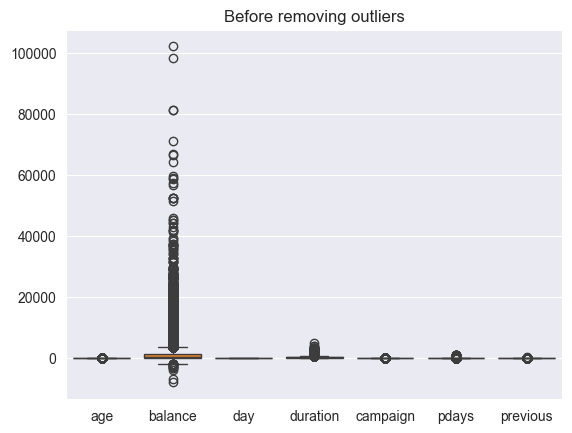

In [153]:
sns.boxplot(df)
plt.title("Before removing outliers")
plt.show()

Transferting categorical variables using one hot encoding and label encoding

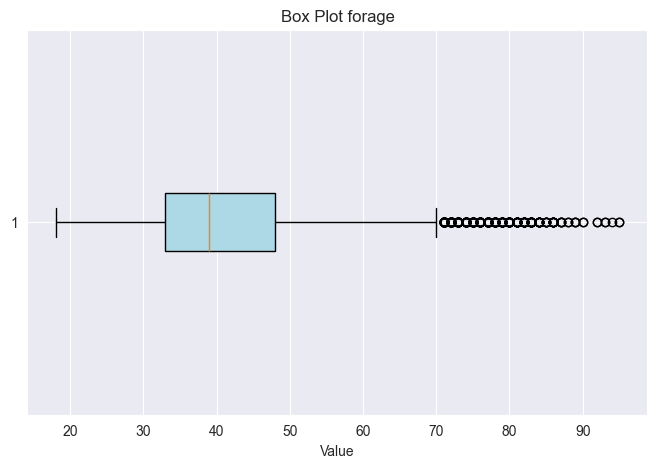

Skipping boxplot for column 'job' as it is not numeric.
Skipping boxplot for column 'marital' as it is not numeric.
Skipping boxplot for column 'education' as it is not numeric.
Skipping boxplot for column 'default' as it is not numeric.


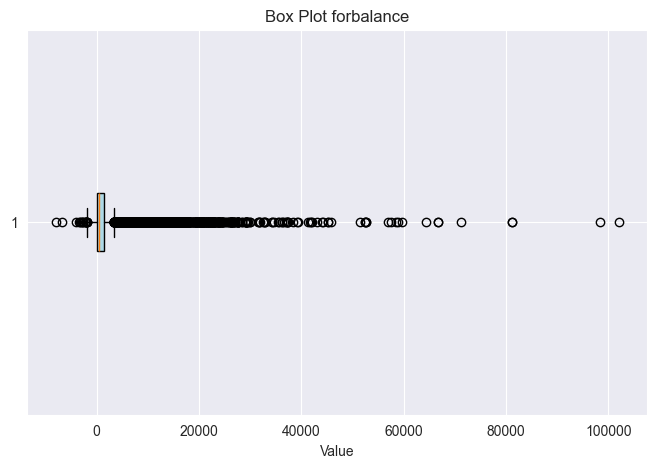

Skipping boxplot for column 'housing' as it is not numeric.
Skipping boxplot for column 'loan' as it is not numeric.
Skipping boxplot for column 'contact' as it is not numeric.


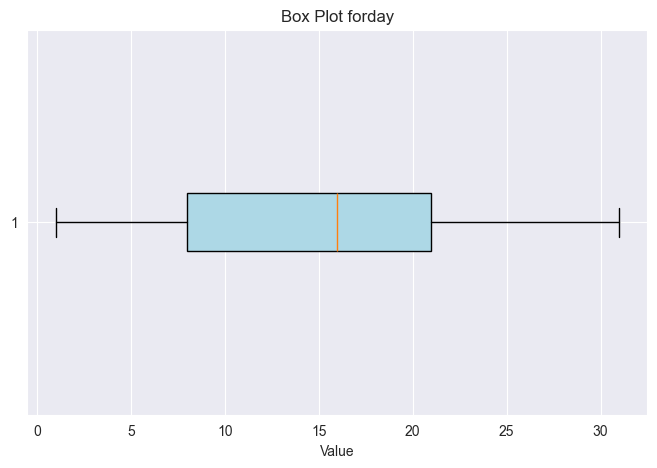

Skipping boxplot for column 'month' as it is not numeric.


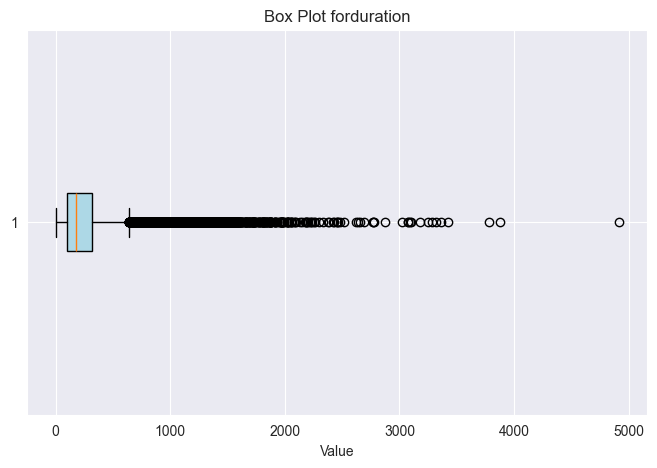

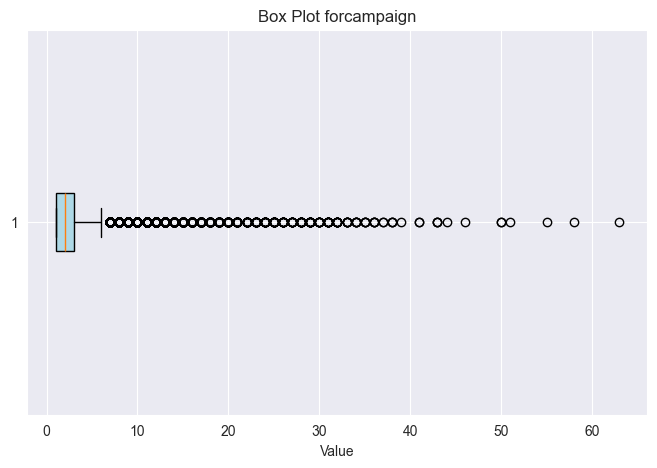

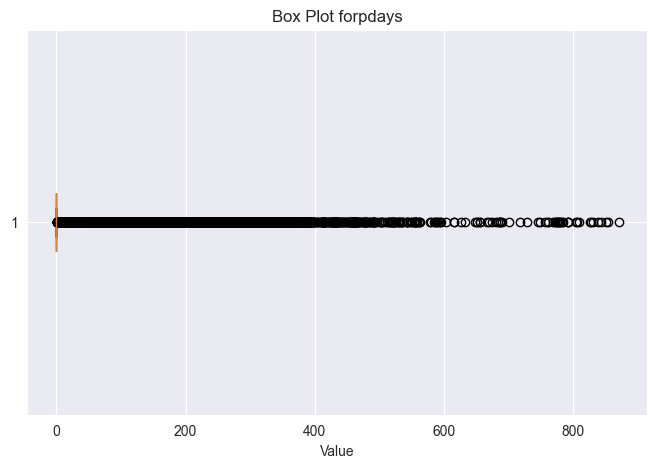

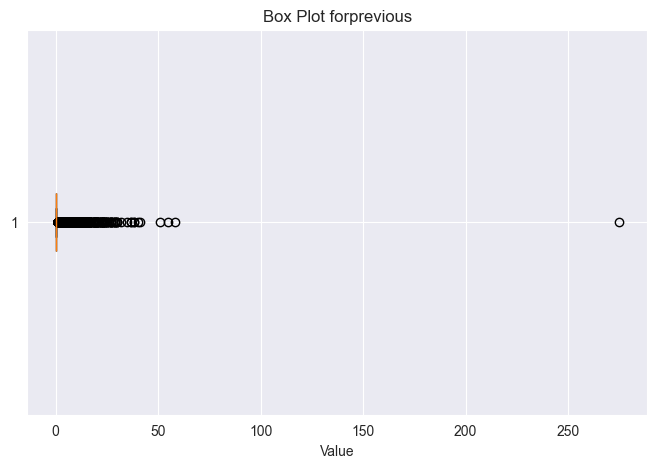

Skipping boxplot for column 'poutcome' as it is not numeric.
Skipping boxplot for column 'y' as it is not numeric.


In [154]:
# Loop through columns, but exclude the 'Date' column (or other non-numeric columns)
for col in df.columns:
    if df[col].dtype in [int, float]:  # Check if the column's data type is numeric
        plt.figure(figsize=(8, 5))
        plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        plt.title("Box Plot for"+ col)
        plt.xlabel("Value")
        plt.show() # Add plt.show() to display each boxplot individually
    else:
        print(f"Skipping boxplot for column '{col}' as it is not numeric.")

In [155]:
# Calculate IQR thresholds
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['age'] = df['age'].clip(lower=lower_bound, upper=upper_bound)



In [156]:
# Calculate IQR thresholds
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['balance'] = df['balance'].clip(lower=lower_bound, upper=upper_bound)




In [157]:
# Calculate IQR thresholds
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['campaign'] = df['campaign'].clip(lower=lower_bound, upper=upper_bound)


In [158]:
# Calculate IQR thresholds
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['duration'] = df['duration'].clip(lower=lower_bound, upper=upper_bound)



In [159]:
# Calculate IQR thresholds
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['pdays'] = df['pdays'].clip(lower=lower_bound, upper=upper_bound)



In [160]:
# Calculate IQR thresholds
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['previous'] = df['previous'].clip(lower=lower_bound, upper=upper_bound)



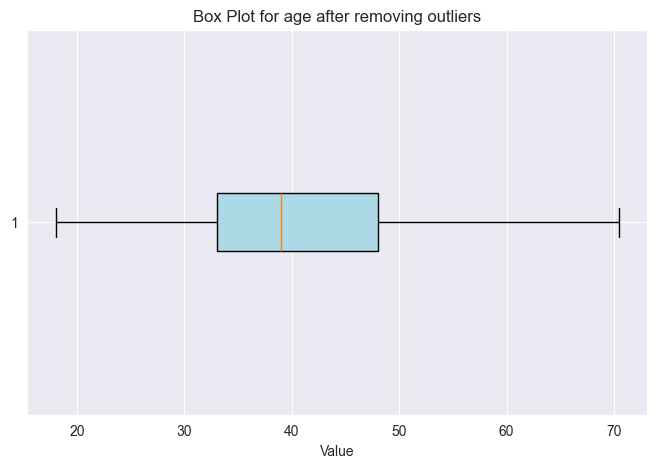

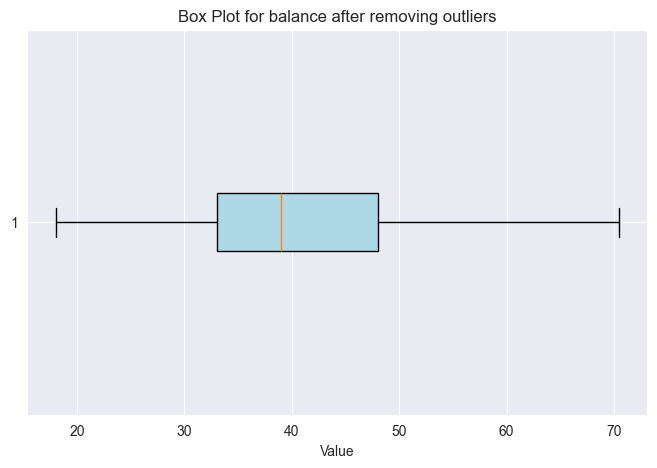

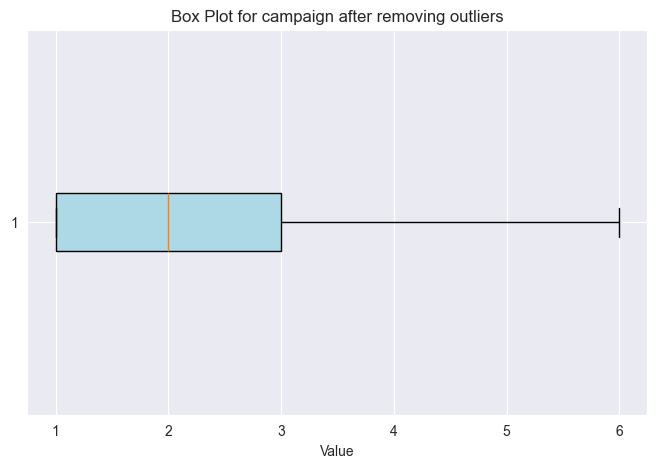

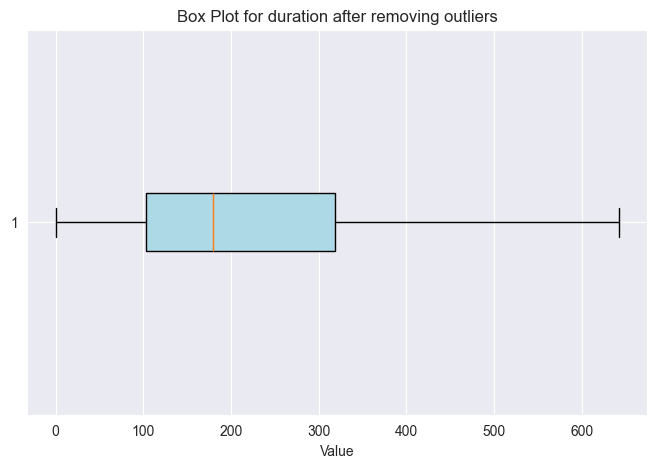

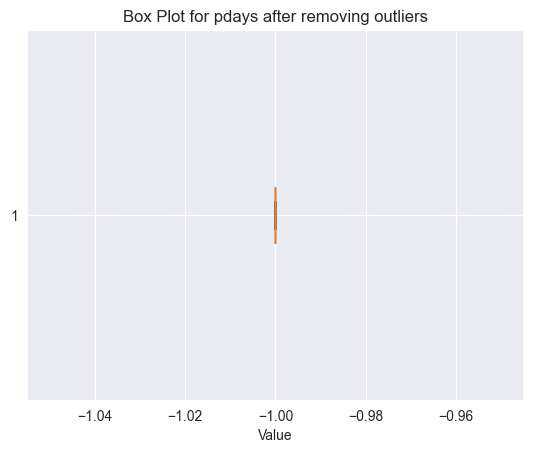

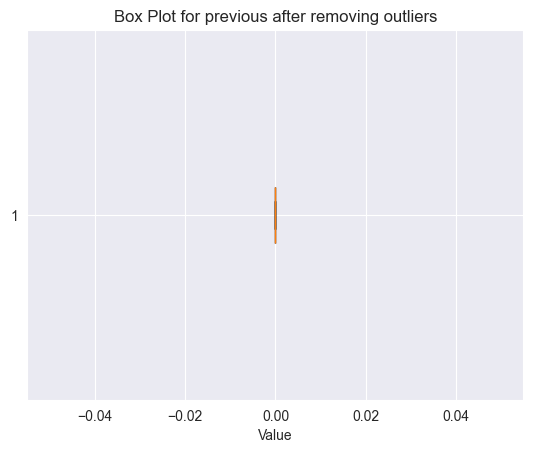

In [161]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for age after removing outliers")
plt.xlabel("Value")
plt.show()
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for balance after removing outliers")
plt.xlabel("Value")
plt.show()
plt.figure(figsize=(8, 5))
plt.boxplot(df['campaign'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for campaign after removing outliers")
plt.xlabel("Value")
plt.show()
plt.figure(figsize=(8, 5))
plt.boxplot(df['duration'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for duration after removing outliers")
plt.xlabel("Value")
plt.show()
plt.boxplot(df['pdays'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for pdays after removing outliers")
plt.xlabel("Value")
plt.show()
plt.boxplot(df['previous'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for previous after removing outliers")
plt.xlabel("Value")
plt.show()


In [162]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [163]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [164]:
df.to_csv("Delimeted_Dataset.csv")

In [165]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [166]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [167]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_encoder = LabelEncoder()

month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

df['month'] = df['month'].str.lower().map(month_mapping)

df['education'] = label_encoder.fit_transform(df['education'])



df['y'] = df['y'].map({'yes': 1, 'no': 0})


nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=nominal_features)
df=df.astype(int)


In [168]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,151,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,92,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [169]:
df["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [170]:
Pearson_Correlation = df.corr(method='pearson')


for col in Pearson_Correlation.columns:
    for index in Pearson_Correlation.index:
        if Pearson_Correlation.loc[index, col] > 0.9 and index != col:
            print(f"{index} and {col}: {Pearson_Correlation.loc[index, col]}")


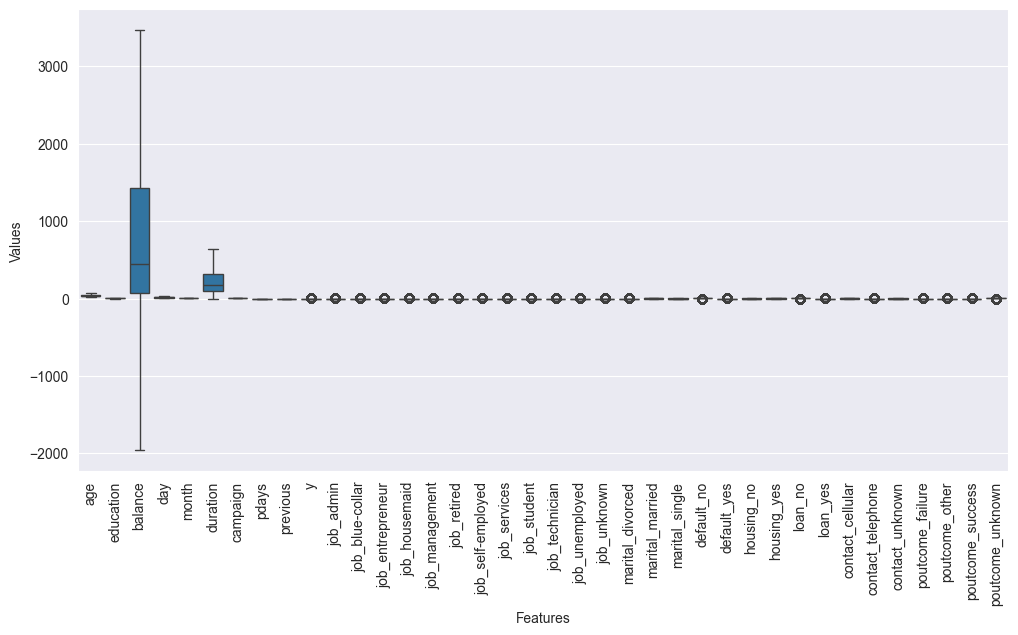

In [171]:
df_melted = df.melt(var_name="Features", value_name="Values")


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Features", y="Values")
plt.xticks(rotation=90)
plt.show()

In [172]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,151,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,92,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


              Feature  Importance
5            duration    0.259052
0                 age    0.109542
2             balance    0.109233
3                 day    0.102621
4               month    0.083462
35   poutcome_success    0.056830
6            campaign    0.041629
1           education    0.029177
36   poutcome_unknown    0.020856
27        housing_yes    0.013191
26         housing_no    0.011742
18     job_technician    0.011699
13     job_management    0.011439
22    marital_married    0.010877
32    contact_unknown    0.010109
30   contact_cellular    0.009955
9           job_admin    0.009871
23     marital_single    0.009623
10    job_blue-collar    0.009280
33   poutcome_failure    0.008640
21   marital_divorced    0.007518
16       job_services    0.007306
29           loan_yes    0.006716
28            loan_no    0.006594
34     poutcome_other    0.005821
14        job_retired    0.005452
15  job_self-employed    0.005069
19     job_unemployed    0.004955
31  contact_te

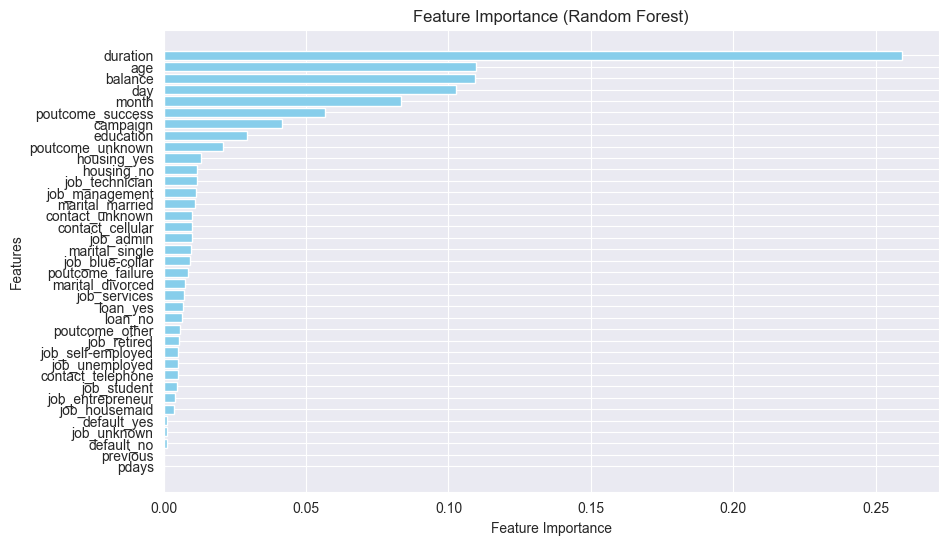

In [173]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

x_train=df.drop(columns=['y'])
y_train=df['y']

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


feature_importances = rf.feature_importances_


features = x_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [174]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['pdays','balance','duration']
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,0.756822,5,5,0.405910,1,0.0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,0.367072,5,5,0.234837,1,0.0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,0.362094,5,5,0.118196,1,0.0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,0.639381,5,5,0.143079,1,0.0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,0.361910,5,5,0.307932,1,0.0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [175]:
from sklearn.preprocessing import StandardScaler

scaling_features=['age', 'campaign', 'previous']
standard_scaler = StandardScaler()

df[scaling_features] = standard_scaler.fit_transform(df[scaling_features])
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.651055,2,0.756822,5,5,0.405910,-0.870092,0.0,0.0,0,...,1,1,0,0,0,1,0,0,0,1
1,0.302248,1,0.367072,5,5,0.234837,-0.870092,0.0,0.0,0,...,1,1,0,0,0,1,0,0,0,1
2,-0.757528,1,0.362094,5,5,0.118196,-0.870092,0.0,0.0,0,...,1,0,1,0,0,1,0,0,0,1
3,0.591279,3,0.639381,5,5,0.143079,-0.870092,0.0,0.0,0,...,1,1,0,0,0,1,0,0,0,1
4,-0.757528,3,0.361910,5,5,0.307932,-0.870092,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,1


In [176]:
from sklearn.decomposition import PCA



X=df.drop(["y","balance","age","day","month","campaign","poutcome_success","pdays","education","previous",'duration'],axis=1)


pca = PCA(0.95)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance)
pca_columns = X_pca[:, :8]
pca_data = np.concatenate([pca_columns], axis=1)
pca_df = pd.DataFrame(pca_data, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'])
pca_df.head()
new_df=pd.concat([df.iloc[:,0:10], pca_df],axis=1)
new_df.head()



Explained Variance Ratio: [0.18981477 0.13831587 0.13047211 0.09053255 0.06708059 0.06078986
 0.05897695 0.05010306 0.04417418 0.03361862 0.02930404 0.01896055
 0.01884189 0.01404131 0.01182015]


,age,education,balance,day,month,duration,campaign,pdays,previous,y,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,1.651055,2,0.756822,5,5,0.405910,-0.870092,0.0,0.0,0,-0.977435,0.490974,-0.169525,-0.370608,0.931344,-0.254142,-0.108786,-0.208366
1,0.302248,1,0.367072,5,5,0.234837,-0.870092,0.0,0.0,0,-0.846006,-0.540116,-1.107939,-0.091377,-0.069491,0.645389,-0.299522,-0.469378
2,-0.757528,1,0.362094,5,5,0.118196,-0.870092,0.0,0.0,0,-1.143216,0.589516,-0.002114,1.109814,0.251700,-0.020617,-0.261821,-0.172624
3,0.591279,3,0.639381,5,5,0.143079,-0.870092,0.0,0.0,0,-1.247110,0.619359,-0.125332,-0.306701,-0.382120,-0.258093,0.275624,-0.034303
4,-0.757528,3,0.361910,5,5,0.307932,-0.870092,0.0,0.0,0,0.268562,0.149515,-1.509453,-0.077746,-0.175880,-0.182524,-0.176405,-0.256351


In [177]:
new_df.isnull().sum()

age          0
education    0
balance      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
PCA1         0
PCA2         0
PCA3         0
PCA4         0
PCA5         0
PCA6         0
PCA7         0
PCA8         0
dtype: int64

In [178]:
df.to_csv("final.csv")

In [179]:
new_df.to_csv('finalPCA.csv')